<a href="https://colab.research.google.com/github/MehmetAltinkurt/Computer_Vision_Projects/blob/main/Wheat/Wheat_Yellow_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download nafishamoin/new-bangladeshi-crop-disease

100% 2.34G/2.35G [00:21<00:00, 131MB/s]
100% 2.35G/2.35G [00:21<00:00, 118MB/s]


In [ ]:
! unzip new-bangladeshi-crop-disease

In [90]:
import os
import shutil

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import PIL
import PIL.Image
from matplotlib.image import imread

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

In [8]:
tf.__version__

'2.11.0'

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
!nvidia-smi

Thu Mar 23 05:31:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    29W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
original_dataset_dir="/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat"

In [12]:
base_dir="/content/tempdir"
os.mkdir(base_dir)

In [14]:
print('total Healthy images:', len(os.listdir(original_dataset_dir+"/Wheat___Healthy")))
print('total Yellow Rust images:', len(os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust")))

total Healthy images: 1116
total Yellow Rust images: 924


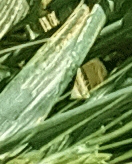

In [15]:
PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923])

In [16]:
#to see if the images are same sized
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[0]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[100]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[350]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[600]).shape)

(276, 96, 3)
(164, 132, 3)
(150, 380, 3)
(210, 138, 3)
(186, 366, 3)


In [69]:
healthy_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Healthy/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #healthy_wheat_list.append(os.path.join(root, file))
            healthy_wheat_list.append(file)

rusty_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Yellow_Rust/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #rusty_wheat_list.append(os.path.join(root, file))
            rusty_wheat_list.append(file)




In [70]:
height_list=[]
width_list=[]

for im in healthy_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[1])

for im in rusty_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[1])

print(height_list)
print(width_list)

[859, 632, 787, 544, 773, 986, 467, 1058, 1587, 1145, 508, 1192, 891, 1344, 687, 1061, 1220, 903, 535, 811, 759, 792, 399, 894, 453, 444, 1351, 672, 848, 1252, 580, 504, 779, 763, 1066, 1022, 490, 1100, 1075, 434, 1441, 312, 1174, 1798, 855, 662, 1304, 636, 472, 569, 1223, 1105, 696, 1099, 1920, 447, 827, 747, 648, 742, 1341, 774, 459, 707, 1108, 591, 521, 455, 522, 640, 898, 380, 302, 777, 505, 1146, 1578, 723, 920, 1274, 1504, 1351, 443, 803, 1452, 383, 835, 766, 568, 1074, 430, 477, 350, 1524, 1087, 821, 579, 753, 636, 408, 328, 892, 482, 470, 870, 448, 2370, 679, 400, 737, 1132, 1425, 427, 1103, 620, 1605, 1130, 890, 527, 504, 1031, 515, 1432, 850, 898, 544, 814, 876, 773, 260, 558, 1826, 917, 706, 574, 751, 904, 680, 888, 239, 1243, 463, 561, 413, 880, 1204, 496, 725, 834, 660, 343, 742, 846, 710, 434, 469, 279, 464, 996, 347, 1256, 685, 284, 1067, 814, 719, 740, 232, 227, 267, 1372, 1206, 1066, 766, 1188, 787, 1515, 2086, 1067, 1678, 843, 614, 1129, 796, 768, 414, 1124, 1408, 855

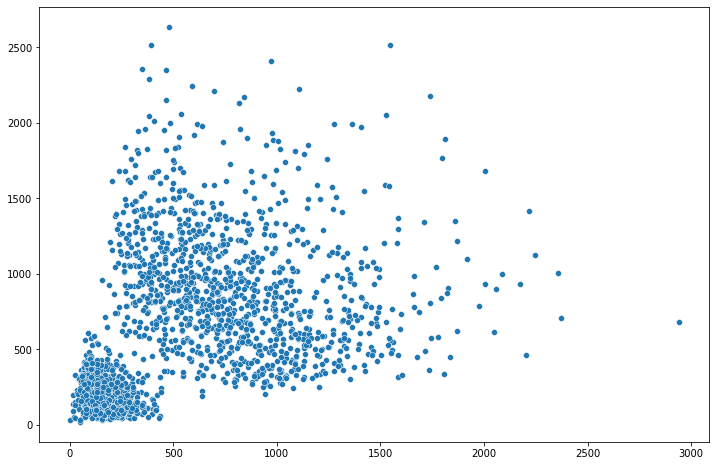

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=height_list, y=width_list);


In [73]:
print(min(height_list))
min_image_index=np.argmin(height_list)
print("index:",min_image_index)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

1
index: 1180


(1, 30, 3)

In [74]:
print(min(width_list))
min_image_index=np.argmin(width_list)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

18


(52, 18, 3)

In [75]:
treshold_for_imsize=20
print("count of images with height less than 20px:",sum(np.array(height_list)<treshold_for_imsize))
print("count of images with width less than 20px:",sum(np.array(width_list)<treshold_for_imsize))

count of images with height less than 20px: 4
count of images with width less than 20px: 1


In [76]:
min_height_image_indexes=[i for i in range(len(height_list)) if height_list[i] < treshold_for_imsize]
for i in min_height_image_indexes:
  im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)])
  im.show()
  print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)]).shape)

(1, 30, 3)


(18, 138, 3)


(18, 94, 3)


(18, 196, 3)


In [77]:
#decided to exclude the image with the height of 1px
rusty_wheat_list.pop(min_image_index-len(healthy_wheat_list))
print(len(rusty_wheat_list))

923


In [78]:
height_list.pop(min_image_index)
width_list.pop(min_image_index)

18

In [79]:
np.mean(height_list),np.median(height_list)

(518.5890142226582, 372.0)

In [80]:
np.mean(width_list),np.median(width_list)

(590.3786169691025, 438.0)

In [81]:
img_size=(372,372)

In [82]:
seed=53
np.random.seed(seed)

In [83]:
np.random.shuffle(healthy_wheat_list)

print(len(healthy_wheat_list))
healthy_test_list=healthy_wheat_list[:int(len(healthy_wheat_list)/5)]
healthy_validation_list=healthy_wheat_list[int(len(healthy_wheat_list)/5):2*int(len(healthy_wheat_list)/5):]
healthy_train_list=healthy_wheat_list[2*int(len(healthy_wheat_list)/5)::]

print(len(healthy_test_list))
print(len(healthy_validation_list))
print(len(healthy_train_list))

1116
223
223
670


In [84]:
np.random.shuffle(rusty_wheat_list)

print(len(rusty_wheat_list))
rusty_test_list=rusty_wheat_list[:int(len(rusty_wheat_list)/5)]
rusty_validation_list=rusty_wheat_list[int(len(rusty_wheat_list)/5):2*int(len(rusty_wheat_list)/5):]
rusty_train_list=rusty_wheat_list[2*int(len(rusty_wheat_list)/5)::]

print(len(rusty_test_list))
print(len(rusty_validation_list))
print(len(rusty_train_list))

923
184
184
555


In [85]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_healthy_dir = os.path.join(train_dir, 'healthy')
os.mkdir(train_healthy_dir)
train_yellow_rust_dir = os.path.join(train_dir, 'yellow_rust')
os.mkdir(train_yellow_rust_dir)
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
os.mkdir(validation_healthy_dir)
validation_yellow_rust_dir = os.path.join(validation_dir, 'yellow_rust')
os.mkdir(validation_yellow_rust_dir)
test_healthy_dir = os.path.join(test_dir, 'healthy')
os.mkdir(test_healthy_dir)
test_yellow_rust_dir = os.path.join(test_dir, 'yellow_rust')
os.mkdir(test_yellow_rust_dir)

FileExistsError: ignored

In [87]:
for fname in healthy_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(train_healthy_dir, fname)
  print(src)
  print(dst)
  shutil.copyfile(src, dst)
for fname in healthy_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(validation_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in healthy_test_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(test_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(train_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(validation_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_test_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(test_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)

/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy664.jpg
/content/tempdir/train/healthy/Healthy664.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy021.jpg
/content/tempdir/train/healthy/Healthy021.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy028.jpg
/content/tempdir/train/healthy/Healthy028.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy1006.jpg
/content/tempdir/train/healthy/Healthy1006.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy567.jpg
/content/tempdir/train/healthy/Healthy567.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy422.jpg
/content/tempdir/train/healthy/Healthy422.jpg
/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy272.jpg
/content/tempdir/train/healthy/Healthy272.jpg
/content/Ba

In [107]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=20,
    class_mode='binary')

Found 1225 images belonging to 2 classes.
Found 407 images belonging to 2 classes.


In [108]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=img_size + (3,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 370, 370, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 185, 185, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 183, 183, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 91, 91, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 89, 89, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 128)     

In [110]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [111]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20)

Epoch 1/20
20/20 [==============================] - 11s 438ms/step - loss: 0.6604 - acc: 0.6550 - val_loss: 0.3639 - val_acc: 0.7950
Epoch 2/20
20/20 [==============================] - 10s 523ms/step - loss: 0.3138 - acc: 0.8900 - val_loss: 0.3230 - val_acc: 0.8550
Epoch 3/20
20/20 [==============================] - 9s 477ms/step - loss: 0.1831 - acc: 0.9350 - val_loss: 0.8600 - val_acc: 0.7075
Epoch 4/20
20/20 [==============================] - 10s 502ms/step - loss: 0.1236 - acc: 0.9584 - val_loss: 0.1061 - val_acc: 0.9625
Epoch 5/20
20/20 [==============================] - 9s 456ms/step - loss: 0.1591 - acc: 0.9455 - val_loss: 0.0630 - val_acc: 0.9825
Epoch 6/20
20/20 [==============================] - 10s 510ms/step - loss: 0.1196 - acc: 0.9558 - val_loss: 0.0405 - val_acc: 0.9925
Epoch 7/20
20/20 [==============================] - 9s 440ms/step - loss: 0.1332 - acc: 0.9675 - val_loss: 0.0432 - val_acc: 0.9875
Epoch 8/20
20/20 [==============================] - 10s 489ms/step - los

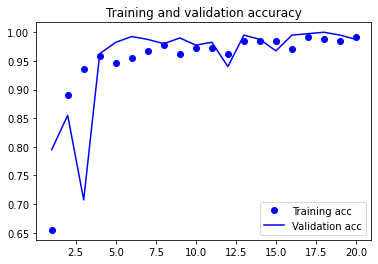

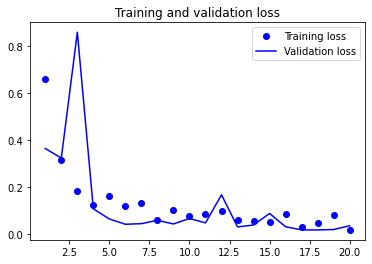

In [112]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()